In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

experiment_names = ['owl_exp_pure',
                    'owl_exp_mixed',
                    'strike_exp_pure',
                    'strike_exp_mixed',
                    'energy_gain_pure',
                    'energy_gain_mixed',
                    ]
totals = []
point_class_dfs = []
parameters = []
for label in experiment_names:
    file_path_pcs = '/home/mremington/Documents/krattle_analysis/krattle_analysis/per_cycle_analysis/data/{}_point_classifacation.csv'.format(label)
    temp_exp_pc = pd.read_csv(file_path_pcs,header = 0, index_col=None)
    point_class_dfs.append(temp_exp_pc)
    for i in range(1,7):
        file_path_totals = '/home/mremington/Documents/uumarrty_exps/{}/exp{}/Data/totals.csv'.format(label,i)
        temp_exp_total = pd.read_csv(file_path_totals,header = 0, index_col=None)
        temp_exp_total['experiment_name'] = [label for i in range(len(temp_exp_total))]
        totals.append(temp_exp_total)
        file_path_parameters = '/home/mremington/Documents/uumarrty_exps/{}/exp{}/Data/parameters.csv'.format(label,i)
        temp_exp_par = pd.read_csv(file_path_parameters,header = 0, index_col=None)
        temp_exp_par['experiment_name'] = [label for i in range(len(temp_exp_par))]
        parameters.append(temp_exp_par)

        
totals = pd.concat(totals, ignore_index=False)
pc_dfs = pd.concat(point_class_dfs, ignore_index=False)
par= pd.concat(parameters, ignore_index=False)

result = pd.merge(pc_dfs,
                  totals[['sim_id','data_type','mean_bush_pref']],
                  how="left",
                  left_on=['sim_id','org'],
                  right_on=["sim_id", "data_type"])

result['figure_label'] = [x[-1] for x in list(result['exp'])]

def format_title(exp_title):
    return exp_title.replace("_", " ").title()

def temp_data(df,filter_val):
    return df[df['exp_name']==filter_val]


    

In [2]:
initial_parm = par[['experiment_name','sim_id','initial_owl_pop','initial_snake_pop','krat_energy_gain_bush','krat_energy_gain_open','snake_strike_success_probability_bush','snake_strike_success_probability_open']]

initial_parm = pd.merge(initial_parm,
                  result[['sim_id','figure_label']],
                  how="left",
                  left_on=['sim_id'],
                  right_on=["sim_id"])
initial_exp_groups=[]
for i in experiment_names:
    if i in ['owl_exp_pure','owl_exp_mixed']:
        df_owl=initial_parm[initial_parm['experiment_name'].isin(['owl_exp_pure','owl_exp_mixed'])].groupby(by=['figure_label'])['initial_owl_pop','initial_snake_pop'].max()
        df_owl=df_owl.reset_index()
    elif i in ['strike_exp_pure','strike_exp_mixed']:
        df_ss=initial_parm[initial_parm['experiment_name'].isin(['strike_exp_pure','strike_exp_mixed'])].groupby(by=['figure_label'])['snake_strike_success_probability_bush','snake_strike_success_probability_open'].max()
        df_ss=df_ss.reset_index()
    elif i in ['energy_gain_pure','energy_gain_mixed']:
        df_eg=initial_parm[initial_parm['experiment_name'].isin(['energy_gain_pure','energy_gain_mixed'])].groupby(by=['figure_label'])['krat_energy_gain_bush','krat_energy_gain_open',].max()
        df_eg = df_eg.reset_index()

<ipython-input-2-11ad31e927ce>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_owl=initial_parm[initial_parm['experiment_name'].isin(['owl_exp_pure','owl_exp_mixed'])].groupby(by=['figure_label'])['initial_owl_pop','initial_snake_pop'].max()
<ipython-input-2-11ad31e927ce>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ss=initial_parm[initial_parm['experiment_name'].isin(['strike_exp_pure','strike_exp_mixed'])].groupby(by=['figure_label'])['snake_strike_success_probability_bush','snake_strike_success_probability_open'].max()
<ipython-input-2-11ad31e927ce>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_eg=initial_parm[initial_parm['experiment_name'].isin(['energy_gain_pure','energy_gain_mixed'])].groupby(by=['figure_label'])['krat_e

<AxesSubplot:xlabel='figure_label'>

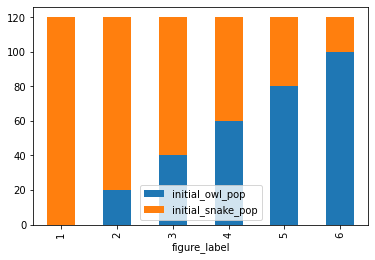

In [3]:
df_owl.set_index('figure_label').plot(kind='bar', stacked=True)

In [3]:
bp_df = result.groupby(['exp_name','org','exp']).agg(
    # Get max of the duration column for each group
    exp_mean_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='mean'),
    exp_std_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='std'),
    exp_se_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='sem')
    )
bp_df = bp_df.reset_index()
bp_df.head()   

,exp_name,org,exp,exp_mean_bp,exp_std_bp,exp_se_bp
0,energy_gain_mixed,krat,experiment1,0.501605,0.022913,0.003240
1,energy_gain_mixed,krat,experiment2,0.496083,0.023798,0.003366
2,energy_gain_mixed,krat,experiment3,0.368180,0.029609,0.004187
3,energy_gain_mixed,krat,experiment4,0.271673,0.016533,0.002338
4,energy_gain_mixed,krat,experiment5,0.233369,0.009154,0.001295


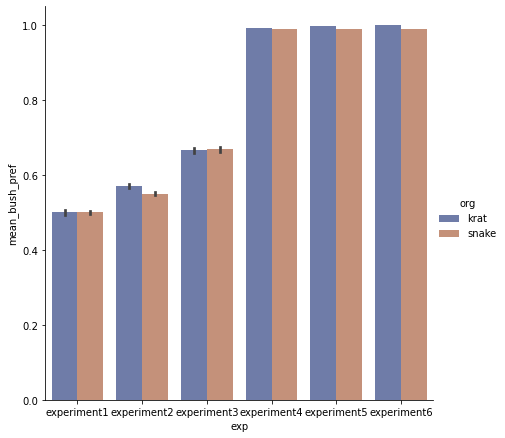

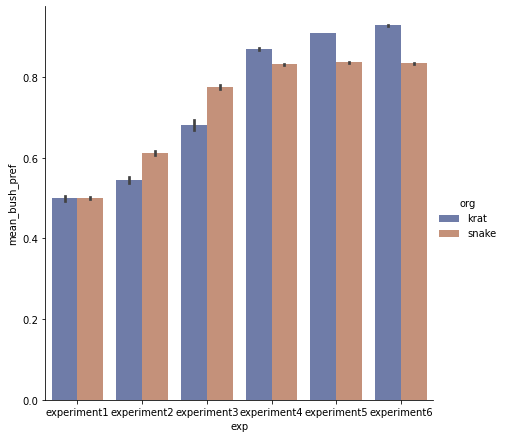

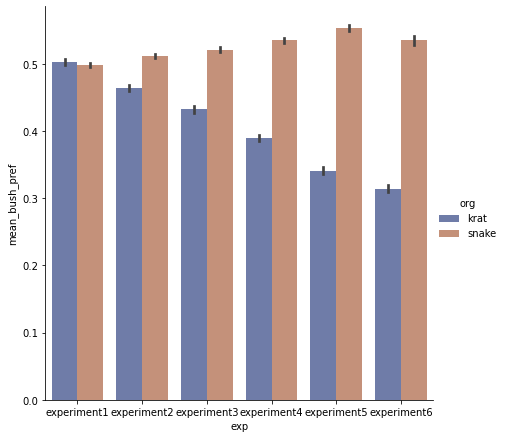

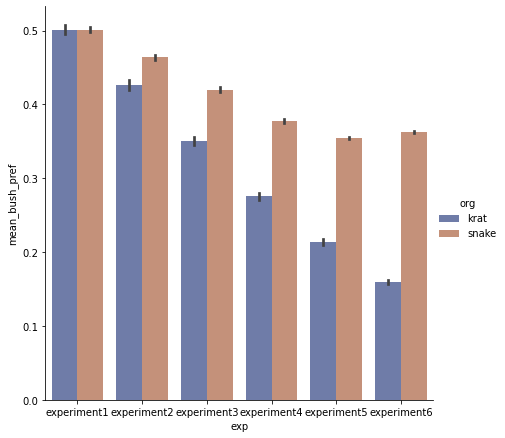

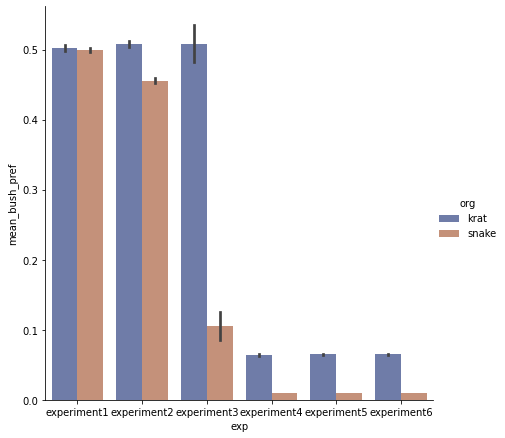

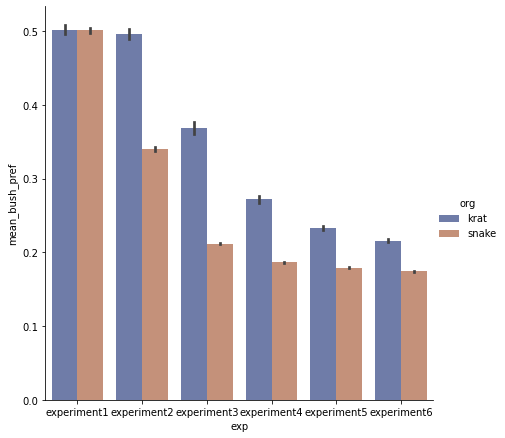

In [5]:
exps = result['exp_name'].unique()
for i in exps:
    temp = temp_data(df=result,filter_val=i)
    ax = sns.catplot(
    data=temp, kind="bar",
    x="exp", y="mean_bush_pref", hue="org",
    ci=95, palette="dark", alpha=.6, height=6
    )
    ax#.set_title(i)


In [7]:
# fig, ax = plt.subplots(len(exps), 3)

# for i, title in enumerate(exps):
#     for j in range(3):
#         if j==0:
#             sns.catplot(
#                 ax= ax[i,j],data=temp, kind="bar",
#                 x="exp", y="mean_bush_pref", hue="org",
#                 ci=95, palette="dark", alpha=.6
#                 )
#     ax[i,j].set_title(title)

# fig



In [12]:
df_owl.head()

,figure_label,initial_owl_pop,initial_snake_pop
0,1,0,120
1,2,20,100
2,3,40,80
3,4,60,60
4,5,80,40


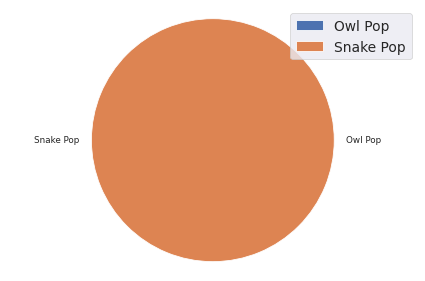

In [92]:
#make owl figures

sns.set_context("paper") 
for index, row in df_owl.iterrows():
    data = [row['initial_owl_pop'],row['initial_snake_pop']]
    fig1, ax1 = plt.subplots()
#     ax1.pie(data, labels=['Owls','Snakes'], autopct='%1.1f%%',
#             shadow=True, startangle=90)
    ax1.pie(data,labels=['Owl Pop','Snake Pop'])
    plt.legend(loc="upper right",fontsize='x-large',)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    #plt.legend(loc="upper right")
    fp = '/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/yaxis_labels/owl_figure_label_{}.png'.format(row['figure_label'])
    #plt.savefig(fp)
    fig1.tight_layout()
    break

In [18]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

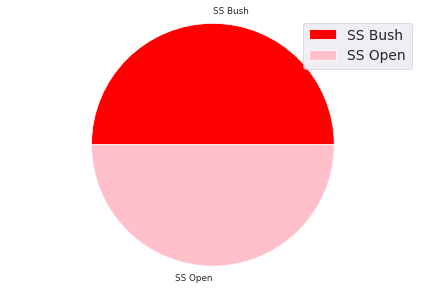

In [90]:
#make snake strike figures

sns.set_context("paper") 
for index, row in df_ss.iterrows():
    data = [row['snake_strike_success_probability_bush'],row['snake_strike_success_probability_open']]
    fig1, ax1 = plt.subplots()
#     ax1.pie(data, labels=['Owls','Snakes'], autopct='%1.1f%%',
#             shadow=True, startangle=90)
    ax1.pie(data,normalize=True,colors=['red','pink'],labels=['SS Bush','SS Open'])
    plt.legend(loc="upper right",fontsize='x-large',)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    #plt.legend(loc="upper right")
    fp = '/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/yaxis_labels/strike_success_figure_label_{}.png'.format(row['figure_label'])
    #plt.savefig(fp)
    fig1.tight_layout()
    break

In [24]:
df_eg.head()

,figure_label,krat_energy_gain_bush,krat_energy_gain_open
0,1,12,12
1,2,10,14
2,3,8,16
3,4,6,18
4,5,4,20


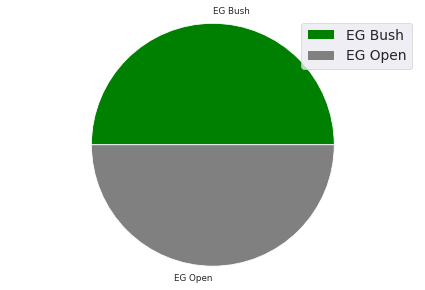

In [38]:
#make eg figures

sns.set_context("paper")
for index, row in df_eg.iterrows():
    data = [row['krat_energy_gain_bush'],row['krat_energy_gain_open']]
    fig1, ax1 = plt.subplots()
#     ax1.pie(data, labels=['Owls','Snakes'], autopct='%1.1f%%',
#             shadow=True, startangle=90)
    ax1.pie(data,normalize=True,colors=['green','grey'],labels=['EG Bush','EG Open'])
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(loc="upper right",fontsize='x-large',)
    fp = '/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/yaxis_labels/energy_gain_figure_label_{}.png'.format(row['figure_label'])
#     plt.savefig(fp)
    fig1.tight_layout()
    break
    


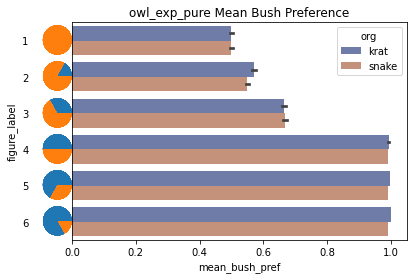

In [14]:
#https://stackoverflow.com/questions/44246650/add-image-annotations-to-bar-plots/44264051#44264051



fig, ax = plt.subplots()

temp = temp_data(df=result,filter_val='owl_exp_pure')
g0 = sns.barplot(
        data=temp, 
        x="mean_bush_pref", y="figure_label", hue="org",
        ci=95, palette="dark", alpha=.6
    ).set(title='{} Mean Bush Preference'.format('owl_exp_pure'))
ax.tick_params(axis='y', which='major', pad=40)

for i in range(1,7):
    name = 'owl_figure_label_{}'.format(i)
    offset_image(i, name, ax)

In [16]:
result.head()

,exp_name,sim_id,exp,org,count_str_flip,mean_strategy_flip_time,std_strategy_flip_time,var_strategy_flip_time,mean_magnitude_of_strategy_flip,std_magnitude_of_strategy_flip,var_magnitude_of_strategy_flip,data_type,mean_bush_pref,figure_label
0,owl_exp_pure,06028c5bc0bb4674a7d322d9ac32ed5e,experiment1,krat,356,16.833803,12.288573,151.009024,0.843390,0.360106,0.129677,krat,0.514374,1
1,owl_exp_pure,06028c5bc0bb4674a7d322d9ac32ed5e,experiment1,snake,373,2.663978,1.234060,1.522904,0.887674,0.263518,0.069442,snake,0.494487,1
2,owl_exp_pure,078a550708c94ad589f54acb02b8b55a,experiment1,krat,385,15.484375,10.767651,115.942314,0.805410,0.393076,0.154509,krat,0.547678,1
3,owl_exp_pure,078a550708c94ad589f54acb02b8b55a,experiment1,snake,383,2.591623,1.096754,1.202869,0.909786,0.211419,0.044698,snake,0.463121,1
4,owl_exp_pure,0ebf538877ac46fda69541db6a494fa0,experiment1,krat,372,16.123989,10.884938,118.481882,0.852848,0.351398,0.123480,krat,0.504739,1


In [ ]:
# Make Pi Chart
for i, title in enumerate(exps):
    #temp = temp_data(df=result,filter_val=title)
    ##Initial condition figs
    if title in ['owl_exp_pure','owl_exp_mixed']:
        df_owl.set_index('figure_label').plot(ax=axes[i,0],kind='bar', stacked=True).set(
            title='{} \n Initial Conditions'.format(format_title(title)),
              xlabel = "Experimental Group",
              ylabel = "Predators")
    elif title in ['strike_exp_pure','strike_exp_mixed']:
        df_ss.set_index('figure_label').plot(ax=axes[i,0],kind='bar', stacked=True).set(
            title='{} \n Initial Conditions'.format(format_title(title)),
              xlabel = "Experimental Group",
              ylabel = "Strike Success Probability")
    elif title in ['energy_gain_pure','energy_gain_mixed']:
        df_eg.set_index('figure_label').plot(ax=axes[i,0],kind='bar', stacked=True).set(
            title='{} \n Initial Conditions'.format(format_title(title)),
              xlabel = "Experimental Group",
              ylabel = "Energy Gain")
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


In [86]:
def get_chart(name):
    path = "/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/yaxis_labels/{}.png".format(name)
    im = plt.imread(path)
    return im


def offset_image(coord, name, ax, zoom=0.15):
    img = get_chart(name)
    im = OffsetImage(img, zoom=zoom)
    im.image.axes = ax

    ab = AnnotationBbox(im, (0, coord-1),  xybox=(-30., 0), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)
    
def get_legend(abrev_name,coord,ax,zoom=1):
    path = "/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/Legends/{}_legend.png".format(abrev_name)
    im = plt.imread(path)
    im = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im, (0, 0),  xybox=(0, 100), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

In [68]:
#help(plt.figimage)

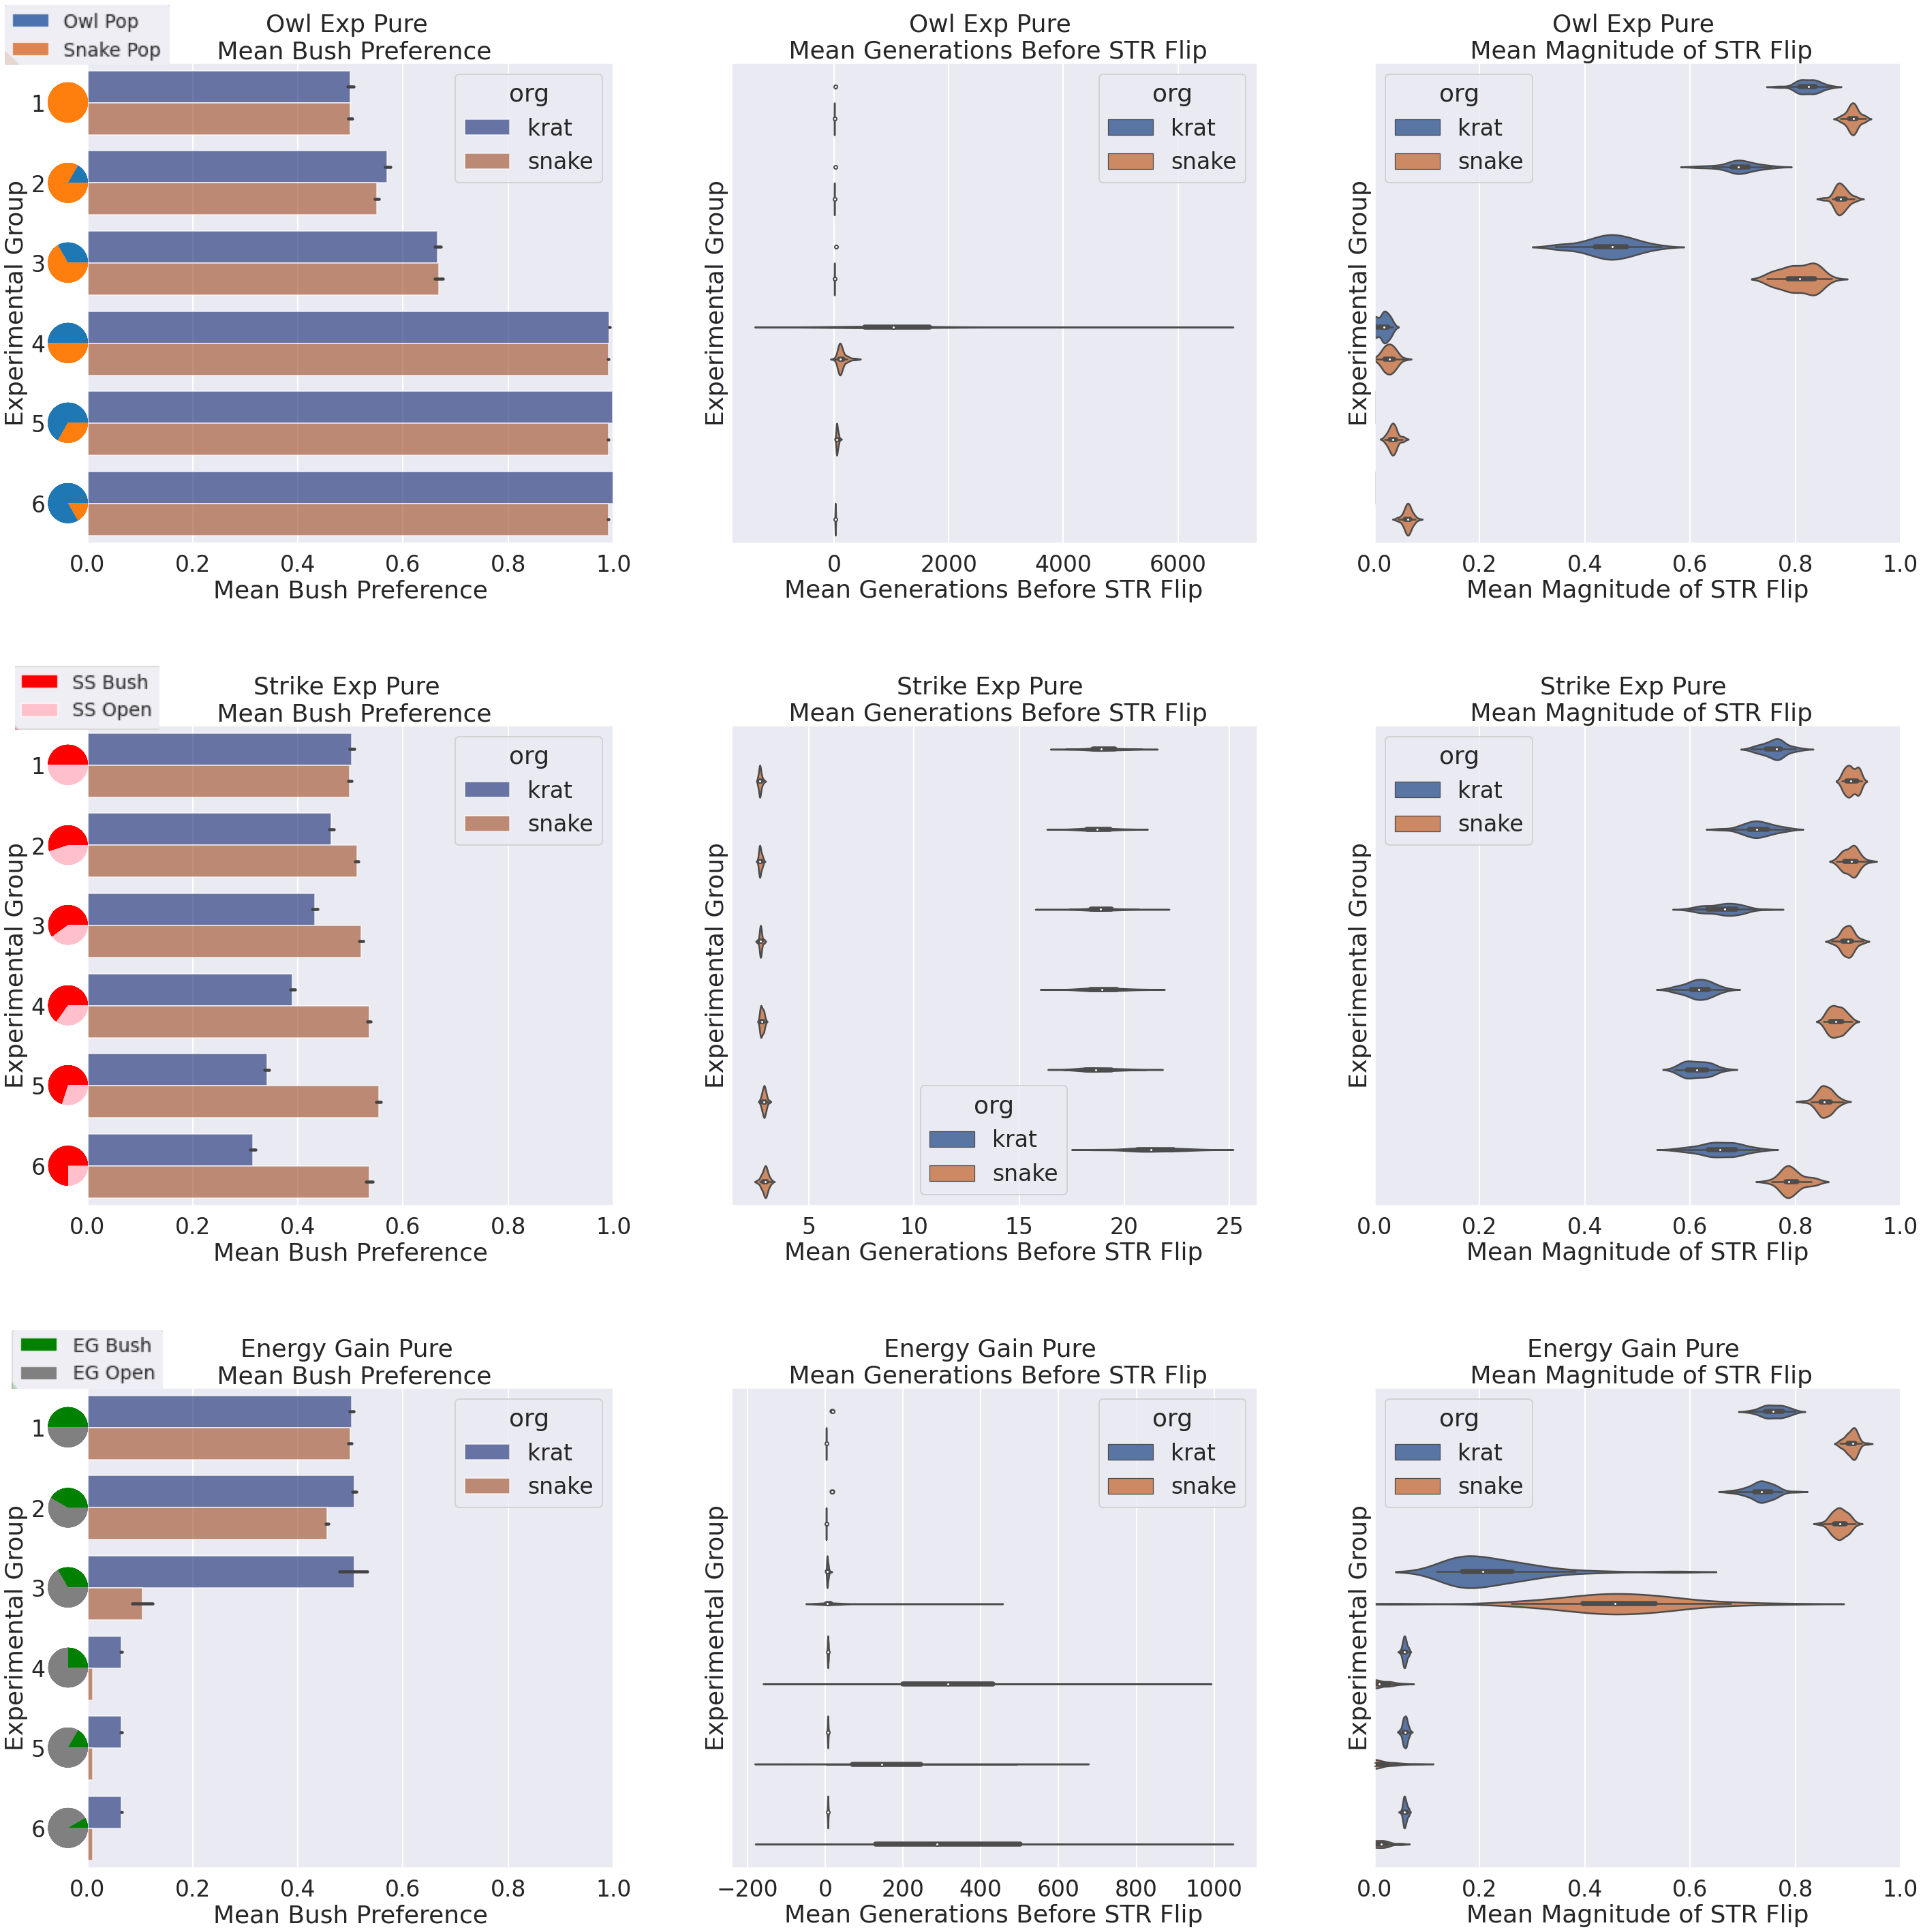

In [96]:
#######################
##### Official Chart ##
#######################
pure_exps = ['owl_exp_pure','strike_exp_pure','energy_gain_pure']

fig, axes = plt.subplots(len(pure_exps), 3, sharex=False,sharey=True, figsize=(42,42))



for i, title in enumerate(pure_exps):
    temp = temp_data(df=result,filter_val=title)
    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
    g0 = sns.barplot(
            ax=axes[i,0], data=temp, 
            x="mean_bush_pref", y="figure_label", hue="org",
            ci=95, palette="dark", alpha=.6
        ).set(title='{} \n Mean Bush Preference'.format(format_title(title)),
              ylabel = "Experimental Group",
              xlabel = "Mean Bush Preference",
              xlim=(0, 1))
    axes[i,0].tick_params(axis='y', which='major', pad=50)
    if title in ['owl_exp_pure','owl_exp_mixed']:
        for j in range(1,7):
            name = 'owl_figure_label_{}'.format(j)
            offset_image(j, name, axes[i,0],zoom=0.3)
    elif title in ['strike_exp_pure','strike_exp_mixed']:
        for j in range(1,7):
            name = 'strike_success_figure_label_{}'.format(j)
            offset_image(j, name, axes[i,0],zoom=0.3)
    elif title in ['energy_gain_pure','energy_gain_mixed']:
        for j in range(1,7):
            name = 'energy_gain_figure_label_{}'.format(j)
            offset_image(j, name, axes[i,0],zoom=0.3)
    get_legend(abrev_name='owl',coord=0,ax=axes[0,0],zoom=2)
    get_legend(abrev_name='ss',coord=0,ax=axes[1,0],zoom=2)
    get_legend(abrev_name='energy_gain',coord=0,ax=axes[2,0],zoom=2)
    g1 = sns.violinplot(ax=axes[i,1],
                        x="mean_strategy_flip_time", y="figure_label",
                        hue="org", data=temp).set(title='{} \n Mean Generations Before STR Flip'.format(format_title(title)),
                                                  ylabel = "Experimental Group",
                                                  xlabel = "Mean Generations Before STR Flip")
    g2 = sns.violinplot(ax=axes[i,2],
                        x="mean_magnitude_of_strategy_flip", y="figure_label",
                        hue="org", data=temp).set(title='{} \n Mean Magnitude of STR Flip'.format(format_title(title)),
                                                  ylabel = "Experimental Group",
                                                  xlabel = "Mean Magnitude of STR Flip",
                                                  xlim=(0, 1))
    
    #height = .01
    #fig.figimage(eg_legend, 0, fig.bbox.ymax - height)


  

# A JointGrid


#gs.update(top=0.7)
fig.tight_layout(pad=3.0)
plt.savefig('/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/figs/mh_pref_grid.png')
plt.show()


In [23]:
#result.head()

,exp_name,sim_id,exp,org,count_str_flip,mean_strategy_flip_time,std_strategy_flip_time,var_strategy_flip_time,mean_magnitude_of_strategy_flip,std_magnitude_of_strategy_flip,var_magnitude_of_strategy_flip,data_type,mean_bush_pref,Figure_Label
0,owl_exp_pure,06028c5bc0bb4674a7d322d9ac32ed5e,experiment1,krat,356,16.833803,12.288573,151.009024,0.843390,0.360106,0.129677,krat,0.514374,1
1,owl_exp_pure,06028c5bc0bb4674a7d322d9ac32ed5e,experiment1,snake,373,2.663978,1.234060,1.522904,0.887674,0.263518,0.069442,snake,0.494487,1
2,owl_exp_pure,078a550708c94ad589f54acb02b8b55a,experiment1,krat,385,15.484375,10.767651,115.942314,0.805410,0.393076,0.154509,krat,0.547678,1
3,owl_exp_pure,078a550708c94ad589f54acb02b8b55a,experiment1,snake,383,2.591623,1.096754,1.202869,0.909786,0.211419,0.044698,snake,0.463121,1
4,owl_exp_pure,0ebf538877ac46fda69541db6a494fa0,experiment1,krat,372,16.123989,10.884938,118.481882,0.852848,0.351398,0.123480,krat,0.504739,1


In [4]:
exps = result['exp_name'].unique()
# An lmplot


# fig, axes = plt.subplots(len(exps), 3, sharex=True,sharey=False, figsize=(18,36))

# for i, title in enumerate(exps):
#     temp = temp_data(df=result,filter_val=title)
#     g0 = sns.barplot(
#             ax=axes[i,0], data=temp, 
#             x='figure_label', y="mean_bush_pref", hue="org",
#             ci=95, palette="dark", alpha=.6
#         ).set(title='{} \n Mean Bush Preference'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Bush Preference",
#               ylim=(0, 1))
#     g1 = sns.violinplot(ax=axes[i,1],x='figure_label', y="mean_strategy_flip_time",hue="org", palette="dark", data=temp).set(title='{} \n Mean Generations Before STR Flip'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Generations Before STR Flip")
#     g2 = sns.violinplot(ax=axes[i,2],x='figure_label', y="mean_magnitude_of_strategy_flip", palette="dark", hue="org", data=temp).set(title='{} \n Mean Magnitude of STR Flip'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Magnitude of STR Flip",
#               ylim=(0, 1))

    

# # A JointGrid


# #gs.update(top=0.7)
# plt.savefig('results.png')
# plt.show()


In [5]:
exps = result['exp_name'].unique()
# An lmplot


# fig, axes = plt.subplots(len(exps), 4, sharex=True,sharey=False, figsize=(24,36))

# for i, title in enumerate(exps):
#     temp = temp_data(df=result,filter_val=title)
#     ##Initial condition figs
#     if title in ['owl_exp_pure','owl_exp_mixed']:
#         df_owl.set_index('figure_label').plot(ax=axes[i,0],kind='bar', stacked=True).set(
#             title='{} \n Initial Conditions'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Predators")
#     elif title in ['strike_exp_pure','strike_exp_mixed']:
#         df_ss.set_index('figure_label').plot(ax=axes[i,0],kind='bar', stacked=True).set(
#             title='{} \n Initial Conditions'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Strike Success Probability")
#     elif title in ['energy_gain_pure','energy_gain_mixed']:
#         df_eg.set_index('figure_label').plot(ax=axes[i,0],kind='bar', stacked=True).set(
#             title='{} \n Initial Conditions'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Energy Gain")
#     ## MHPREF
#     g1 = sns.barplot(
#             ax=axes[i,1], data=temp, 
#             x='figure_label', y="mean_bush_pref", hue="org",
#             ci=95, palette="dark", alpha=.6
#         ).set(title='{} \n Mean Bush Preference'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Bush Preference",
#               ylim=(0, 1))
#     ## Generations
#     g2 = sns.violinplot(ax=axes[i,2],x='figure_label', y="mean_strategy_flip_time",hue="org", palette="dark", data=temp).set(title='{} \n Mean Generations Before STR Flip'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Generations Before STR Flip")
#     #Magnitude
#     g3 = sns.violinplot(ax=axes[i,3],x='figure_label', y="mean_magnitude_of_strategy_flip", palette="dark", hue="org", data=temp).set(title='{} \n Mean Magnitude of STR Flip'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Magnitude of STR Flip",
#               ylim=(0, 1))

    

# # A JointGrid


# #gs.update(top=0.7)
# #plt.savefig('results_with_ic.png')
# plt.show()


In [6]:
#df_eg.head()

In [1]:
help(sns.plot)

NameError: name 'sns' is not defined